# Bikes

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
RANDOM_SEED = 4579
np.random.seed(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Biking with BART

In [3]:
bikes = pd.read_csv("bikes.csv")

X = bikes[["hour", "temperature", "humidity", "windspeed"]]
Y = bikes["count"]

In [4]:

with pm.Model() as model_bikes:
    α = pm.Exponential("α", 0.1)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ", np.exp(μ_))
    y = pm.NegativeBinomial("y", mu=μ, alpha=α, observed=Y)

    idata_bikes = pm.sample(random_seed=RANDOM_SEED,
                            compute_convergence_checks=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.


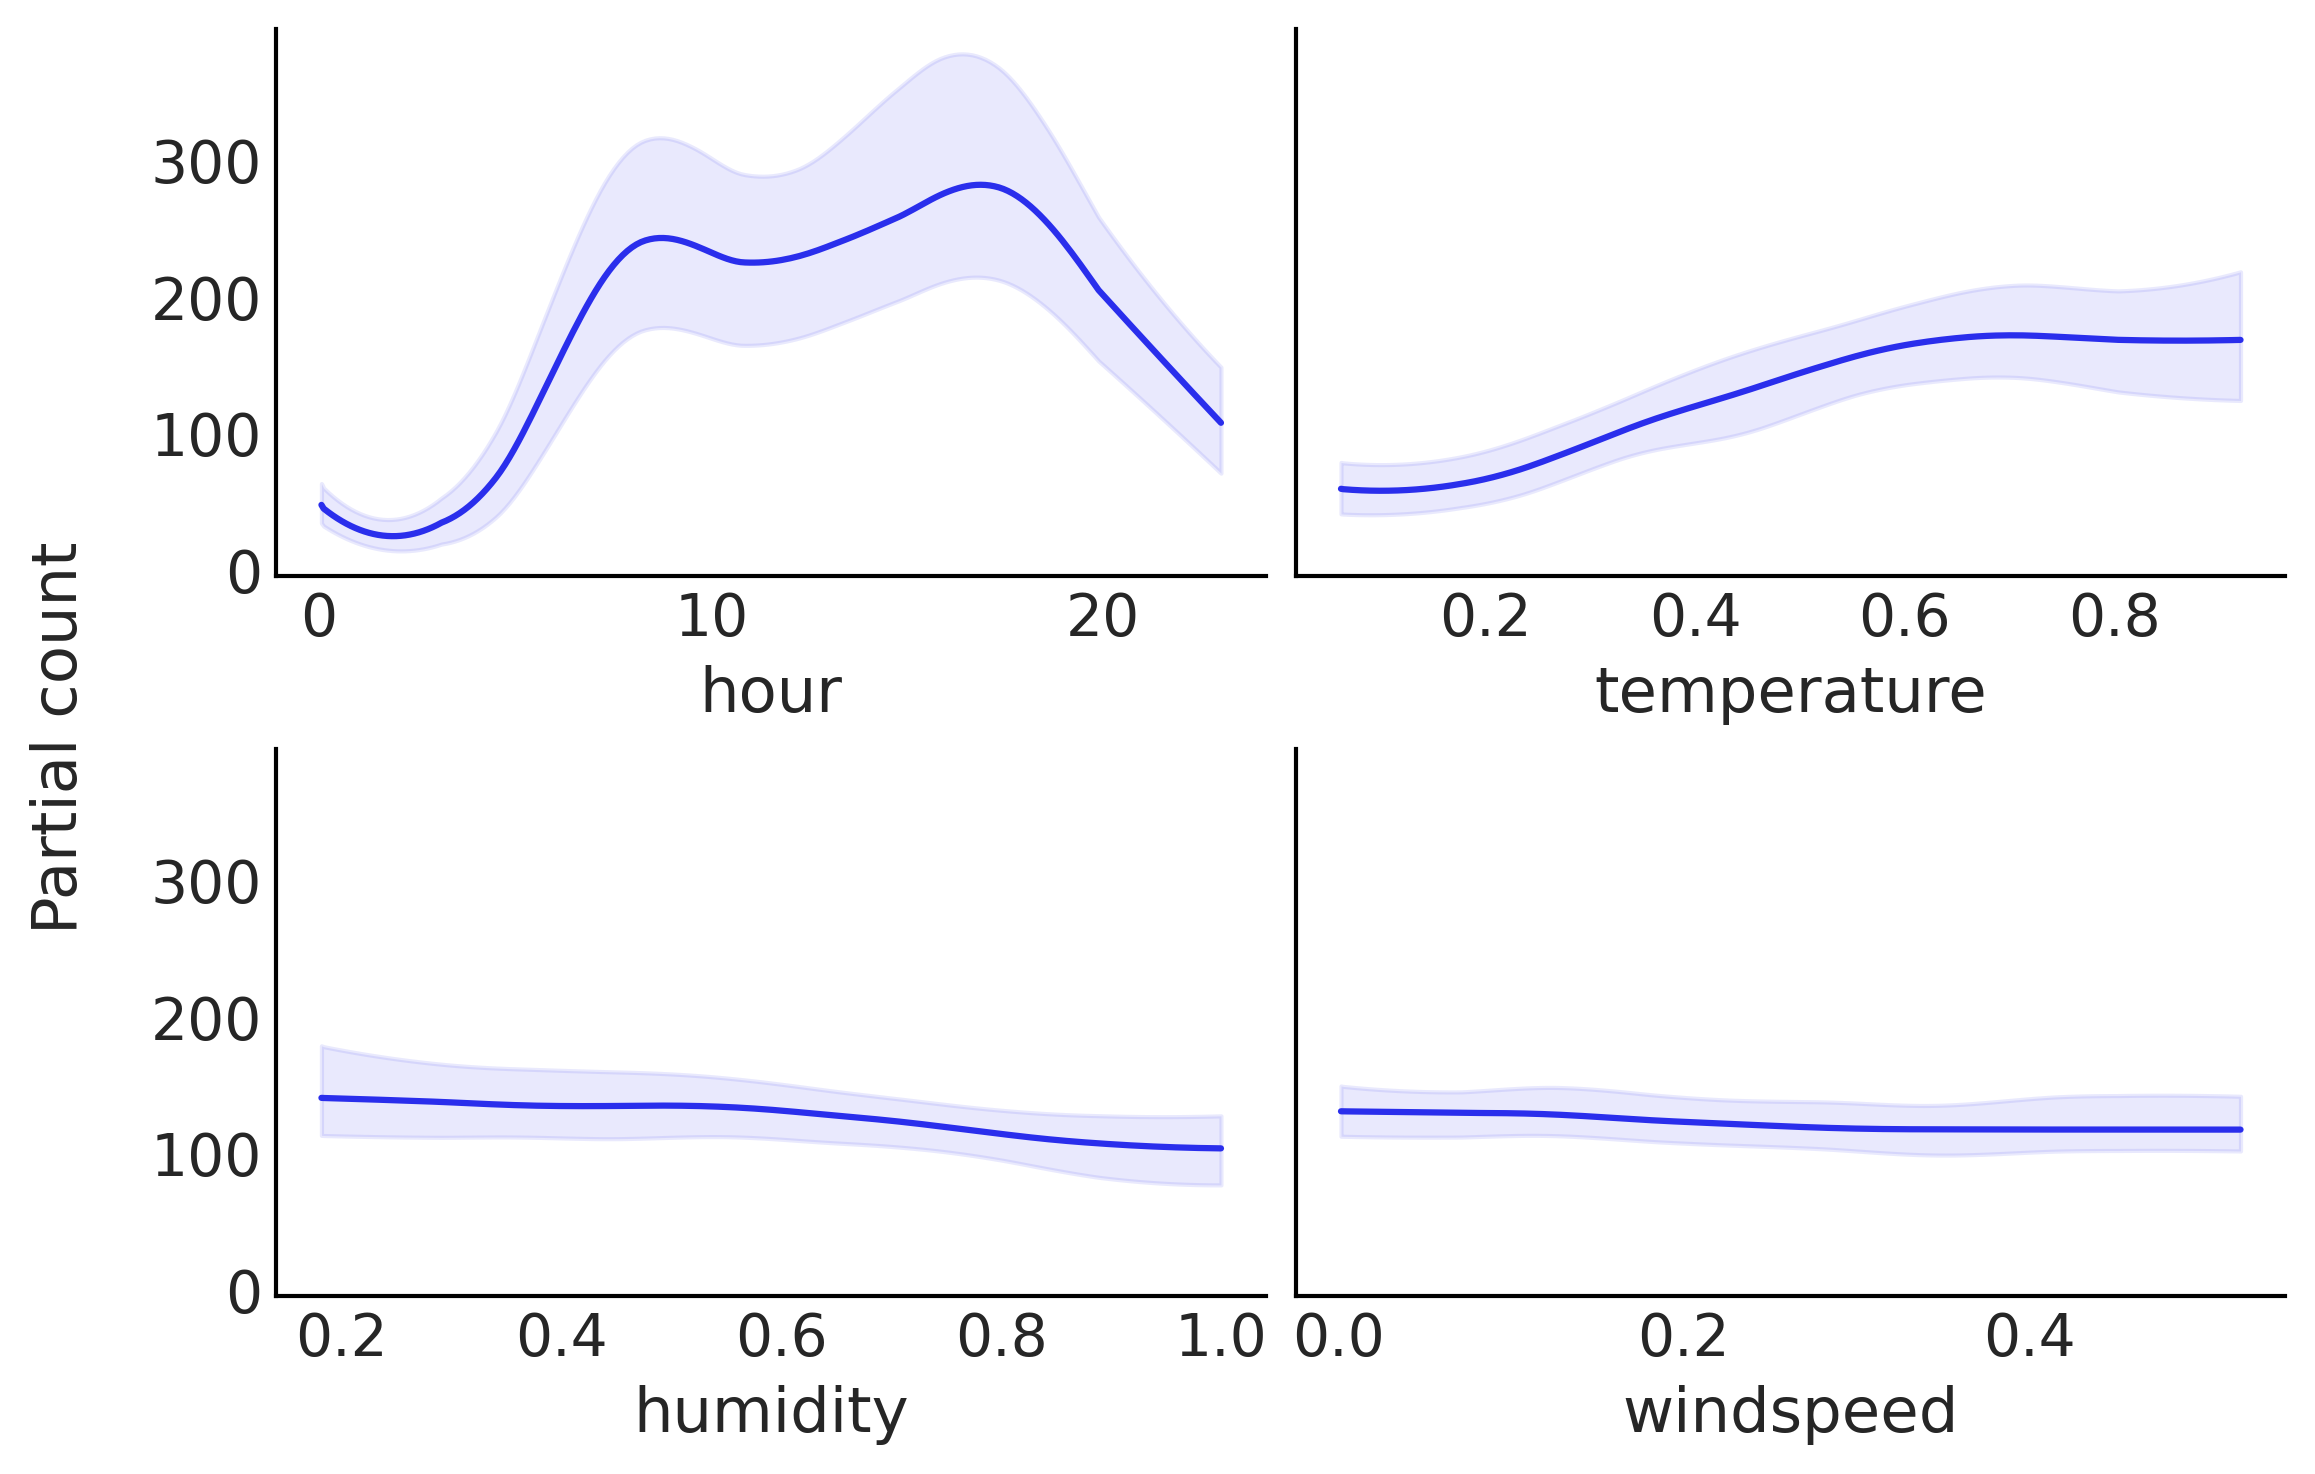

In [5]:
pmb.plot_pdp(μ_, X=X, Y=Y, grid=(2, 2), func=np.exp);


In [6]:
az.summary(idata_bikes, var_names=["α"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,2.422,0.25,1.947,2.876,0.008,0.006,951.0,1691.0,1.01


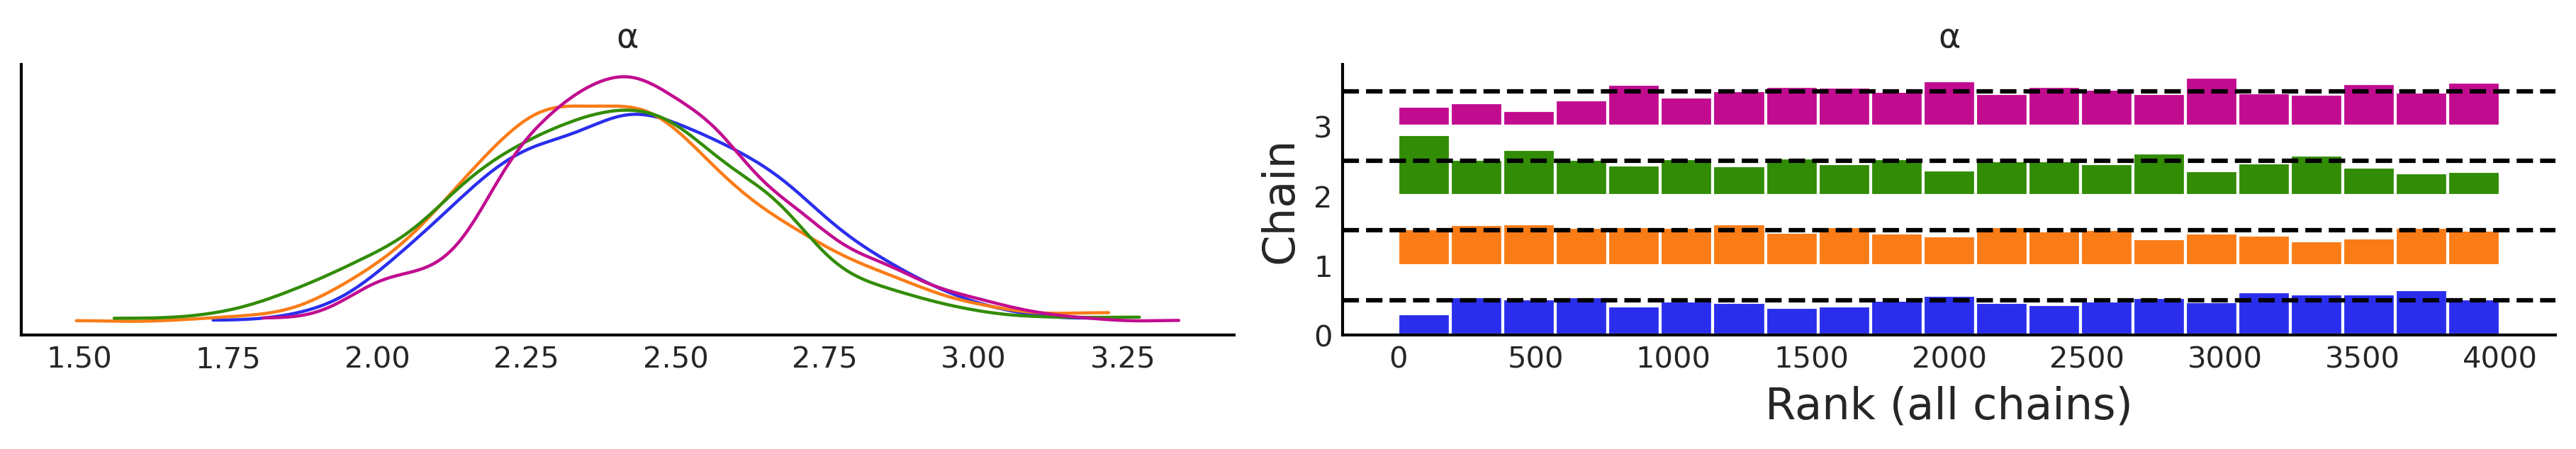

In [7]:
az.plot_trace(idata_bikes, compact=False, var_names=["α"], kind="rank_bars");

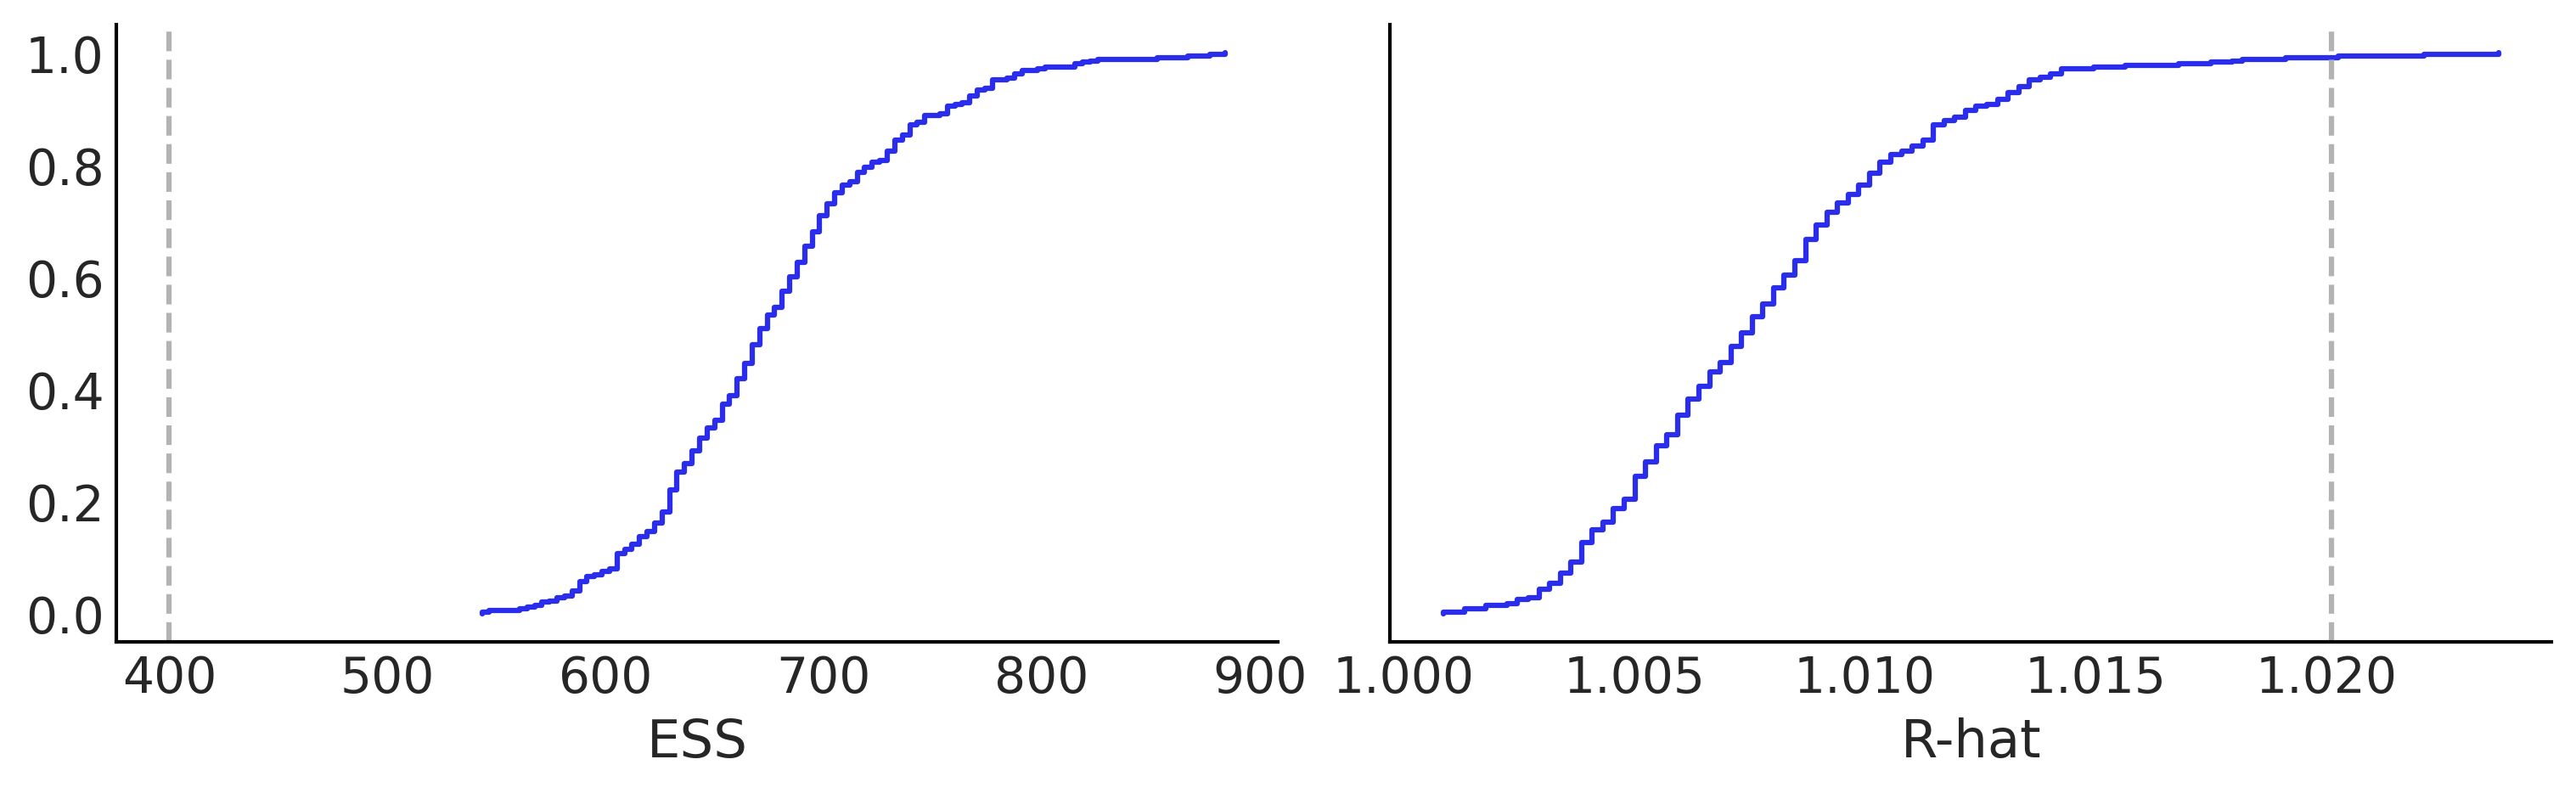

In [8]:
pmb.plot_convergence(idata_bikes, var_name="μ");

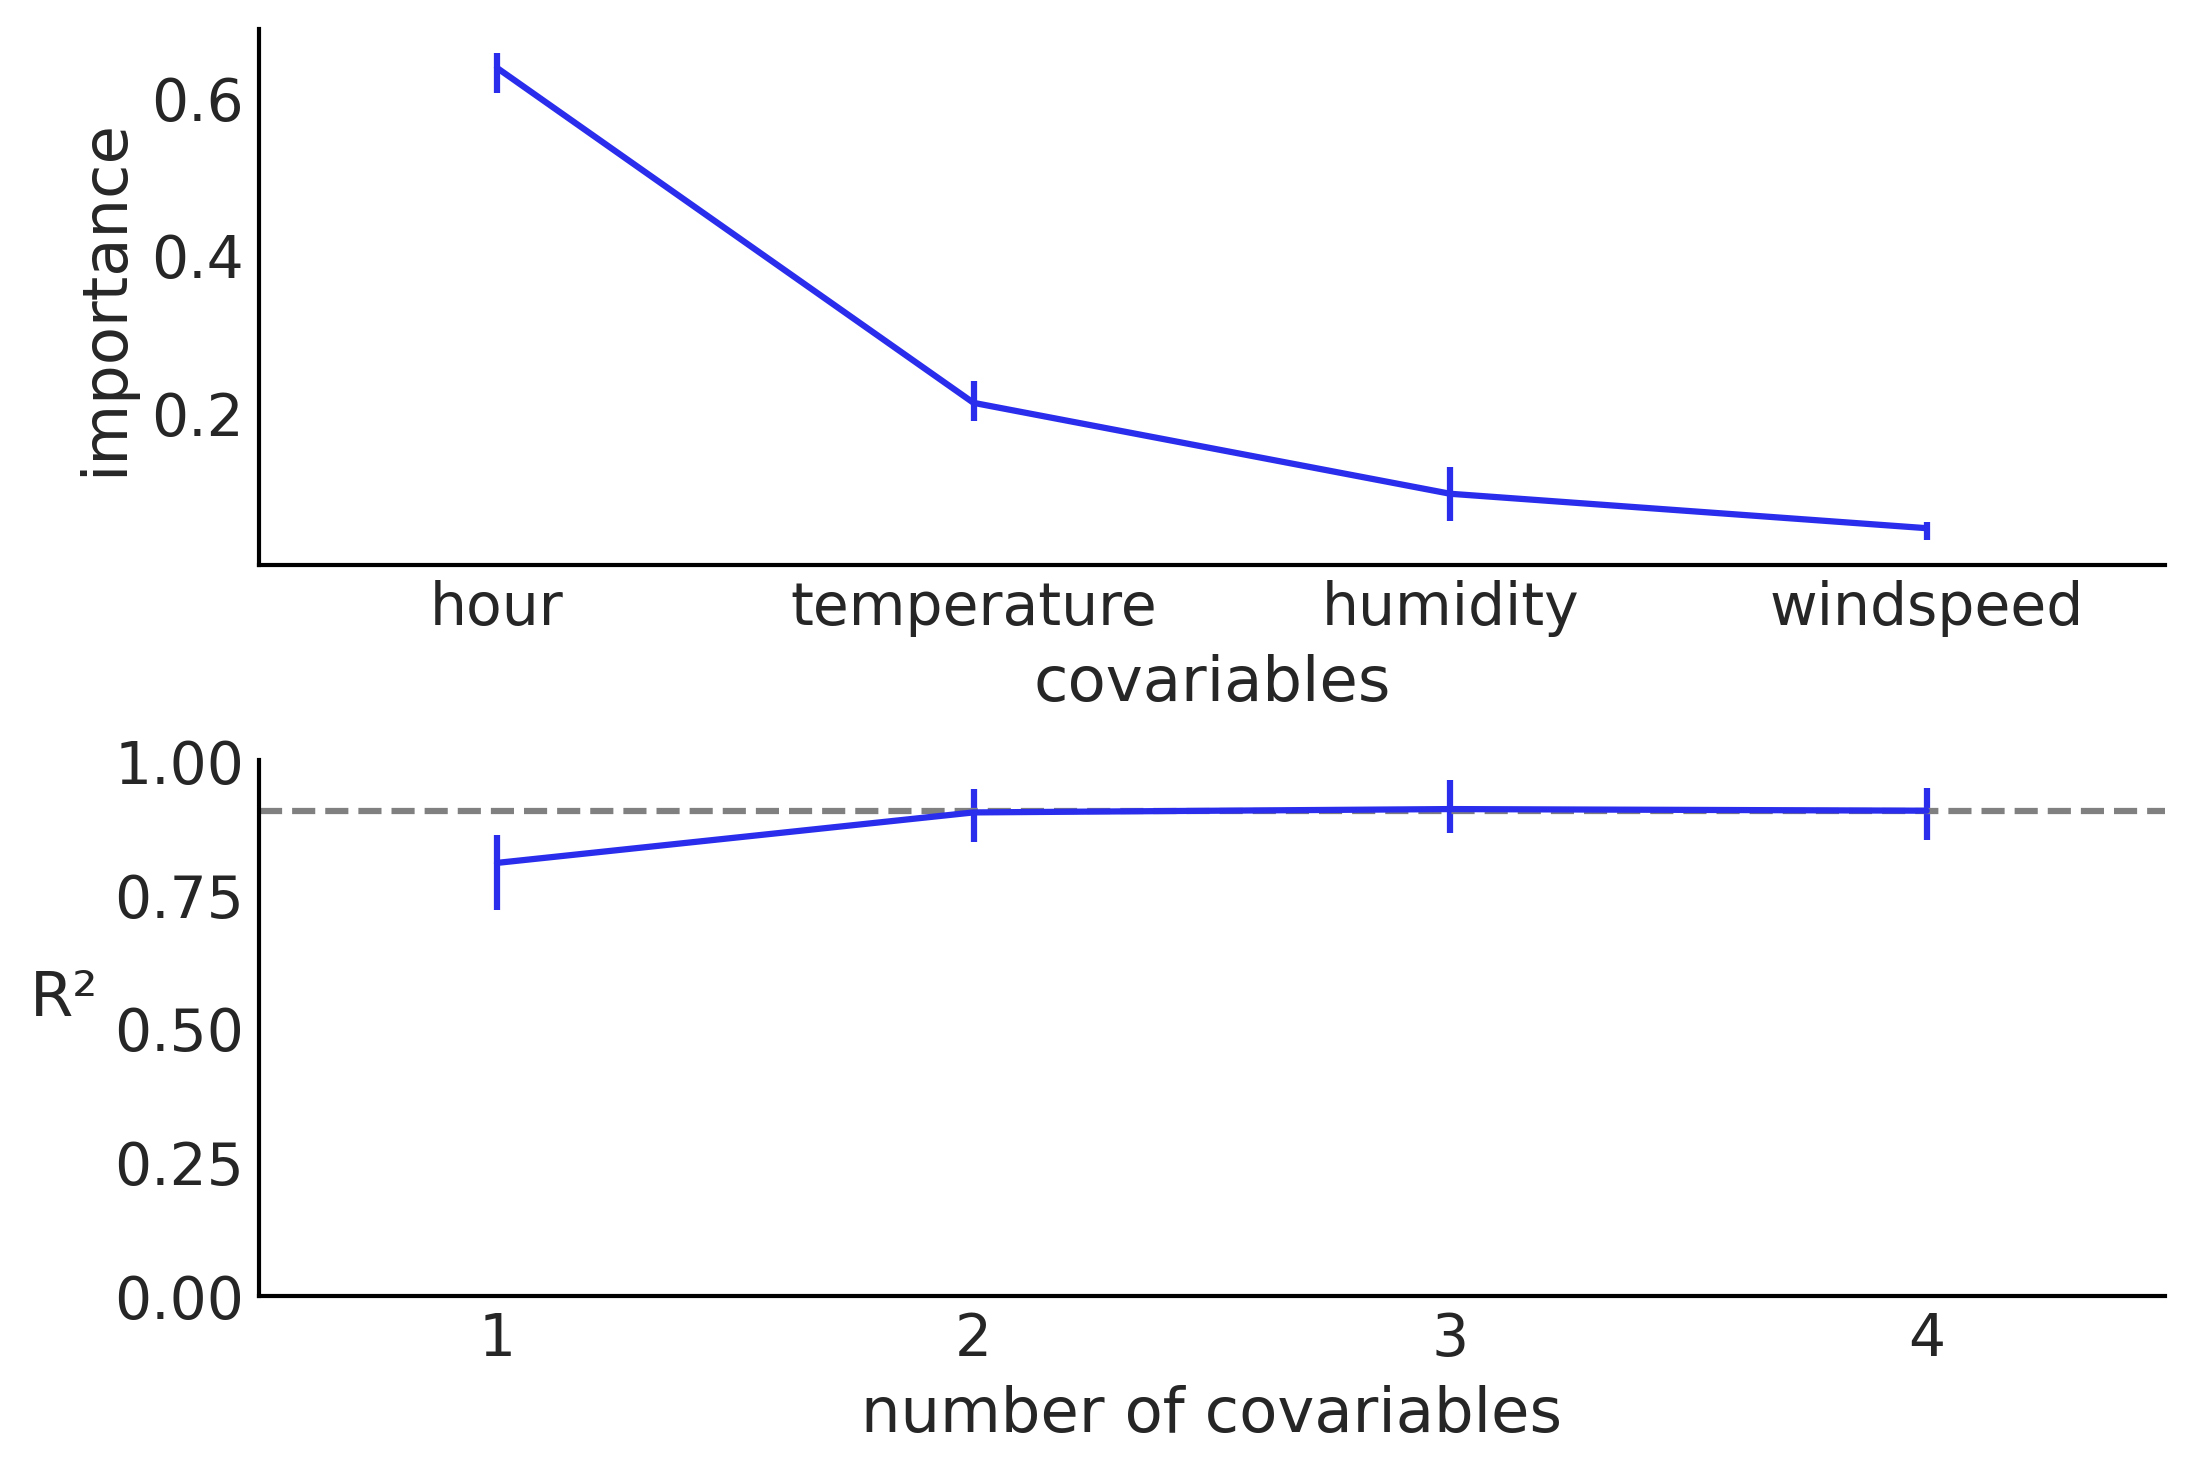

In [9]:
pmb.utils.plot_variable_importance(idata_bikes, μ_, X, samples=100);